
# **Real estate price prediction using data from Ames, Iowa**
### Patricio Hernandez Senosiain
---


## Contents

> [1 - Introduction](#1---Introduction)
> 
> [2 - Importing dependencies](#2---Importing-dependencies)
> 
> [3 - Data retrieval and exploratory analysis](#3---Data-retrieval-and-exploratory-analysis)
> 
> [4 - Data cleaning and preprocessing](#4---Data-cleaning-and-preprocessing)
> 
> [5 - Modelling](#5---Modelling)
> 
> [6 - Final predictions and submission](#6---Final-predictions-and-submission)


## 1 - Introduction


In this notebook, I will aim to model house prices using a variety of machine learning algorithms and housing data from Ames, Iowa. Furthermore, I will attempt to forecast house prices for out-of-sample data and the resultant predictions will then be submmited to the Housing Prices Competition for Kaggle Learn Users. 


## 2 - Importing dependencies

In [1]:

# Importing libraries and modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Declaring standard Seaborn color palette
standard_palette = []
for i in range(10):
    standard_palette += list(sns.color_palette('muted')) 

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


## 3 - Data retrieval and exploratory analysis


> [3.1 - Data retrieval](#3.1---Data-retrieval)
> 
> [3.2 - General overview](#3.2---General-overview)
> 
> [3.3 - Distribution of target variable](#3.3---Distribution-of-target-variable)
> 
> [3.4 - Distribution of features](#3.4---Distribution-of-features)
>
> [3.5 - Bivariate analysis of numerical features](#3.5---Bivariate-analysis-of-numerical-features)
> 
> [3.6 - Correlation between features](#3.6---Correlation-between-features)
> 
> [3.7 - Overview of missing values](#3.7---Overview-of-missing-values)
> 

### 3.1 - Data retrieval

In [2]:

# Reading training data into Pandas DataFrame object
data = pd.read_csv('train.csv')


### 3.2 - General overview

In [3]:

# Examining the first 10 dataset rows
data.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:

# Examining the last five datset rows
data.tail(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:

# Deleting 'Id' column from dataset
data = data.drop('Id', axis=1)

# General overview of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil


#### **NOTES FROM (3.2):**

* 80 columns
* 1460 rows
* First 79 columns correspond to features
* The 80th column corresponds to the target variable `SalePrice`
* 36 numerical features
* 43 non-numerical features

#### **OBSERVATIONS:**
* Some numerical features could be categorical, thus further classification is required
* Numerical features could be classified as 'object' due to erroneous entries


### 3.3 - Distribution of target variable

In [6]:

# Separating data for target variable
target = data['SalePrice']

# Summary statistics for target variable
target.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

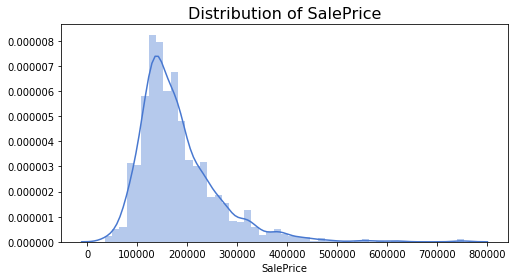

In [7]:

# Plotting distribution of values for target variable
plt.figure(figsize=(8,4))
sns.distplot(target, color=standard_palette[0])
plt.title('Distribution of SalePrice', size=16)
plt.show()


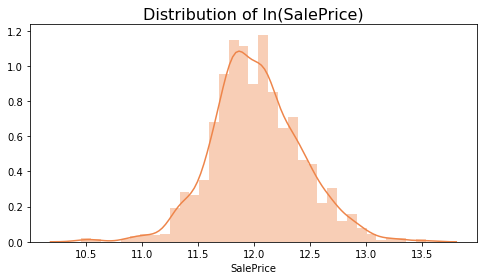

SalePrice skewness: 1.8828757597682129

ln(SalePrice) skewness: 0.12133506220520406


In [8]:

# Plotting distribution of of log-transformed target variable
log_target = np.log(target)
plt.figure(figsize=(8,4))
sns.distplot(log_target, color=standard_palette[1])
plt.title('Distribution of ln(SalePrice)', size=16)
plt.show()

# Calculating skewness of target variable data
print('SalePrice skewness: '+ str(target.skew()))
print('')

# Calculating skewness of log-transformed target variable data
print('ln(SalePrice) skewness: '+ str(log_target.skew()))


#### **NOTES FROM (3.3):**

* No missing values for `SalePrice`
* Distribution of house prices is significantly skewed

#### **OBSERVATIONS:**
* `SalePrice` data should be log-transformed to reduce skew (benefits regression models)
* After fitting a model with log-tranformed `SalePrice` predictions should be inversely transformed


### 3.4 - Distribution of features


In Section 3.2 features were classified as either numerical or non-numerical, but it was noted that some numerical features might be categorical and some non-numerical features might be wrongly classified. The aim of this section is to further classify features into the [following categories](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee) based on their data types, which will be more useful in terms of data analysis, preprocessing, and modelling:

- Categorical (nominal)
- Categorical (ordinal)
- Discrete (interval)
- Discrete (ratio)
- Continuous (interval)
- Continuous (ratio)


In [9]:

# Separating data for numerical features
num_feats = data.select_dtypes(include='number').drop(['SalePrice'], axis=1).copy()
num_feats.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


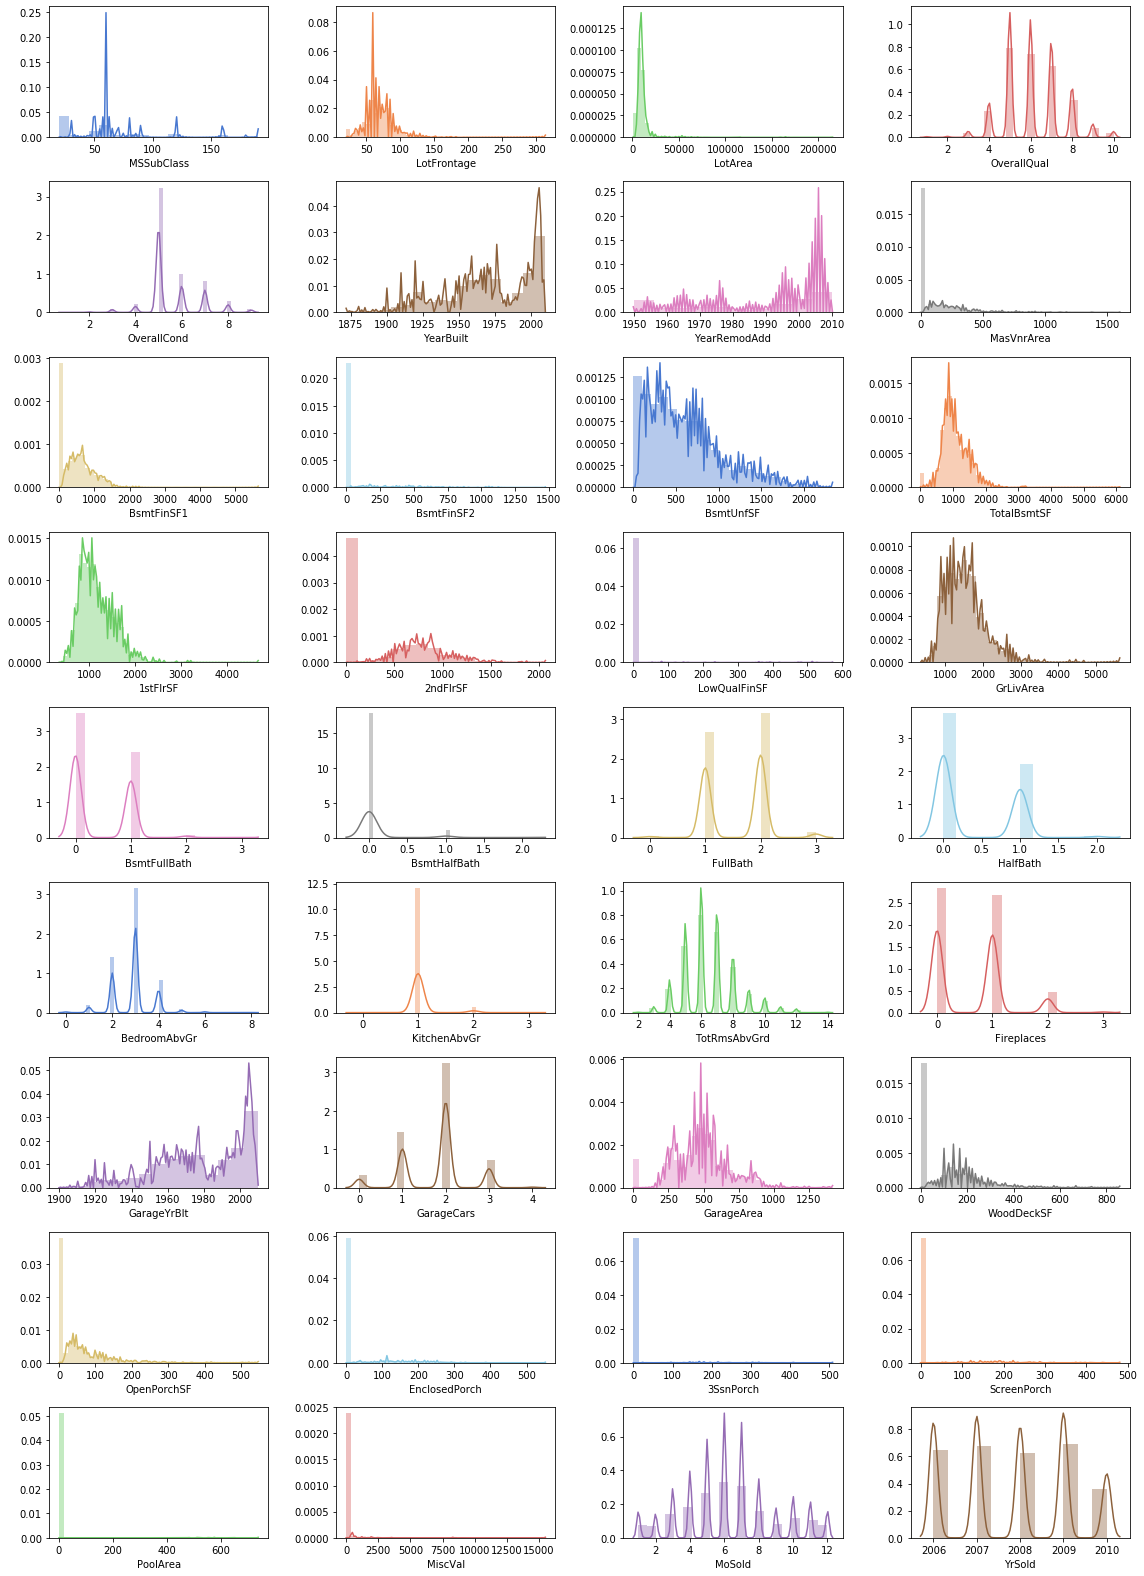

In [10]:

# Plotting distribution of data for numerical features
fig = plt.figure(figsize=(16,22))

for i in range(len(num_feats.columns)):
    
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_feats.iloc[:,i].dropna(), hist=True, kde_kws={'bw':0.1}, color=standard_palette[i])
    
plt.tight_layout()
plt.show()


In [11]:

# Separating data for non-numerical features
not_num_feats = data.select_dtypes(exclude='number').copy()
not_num_feats.describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


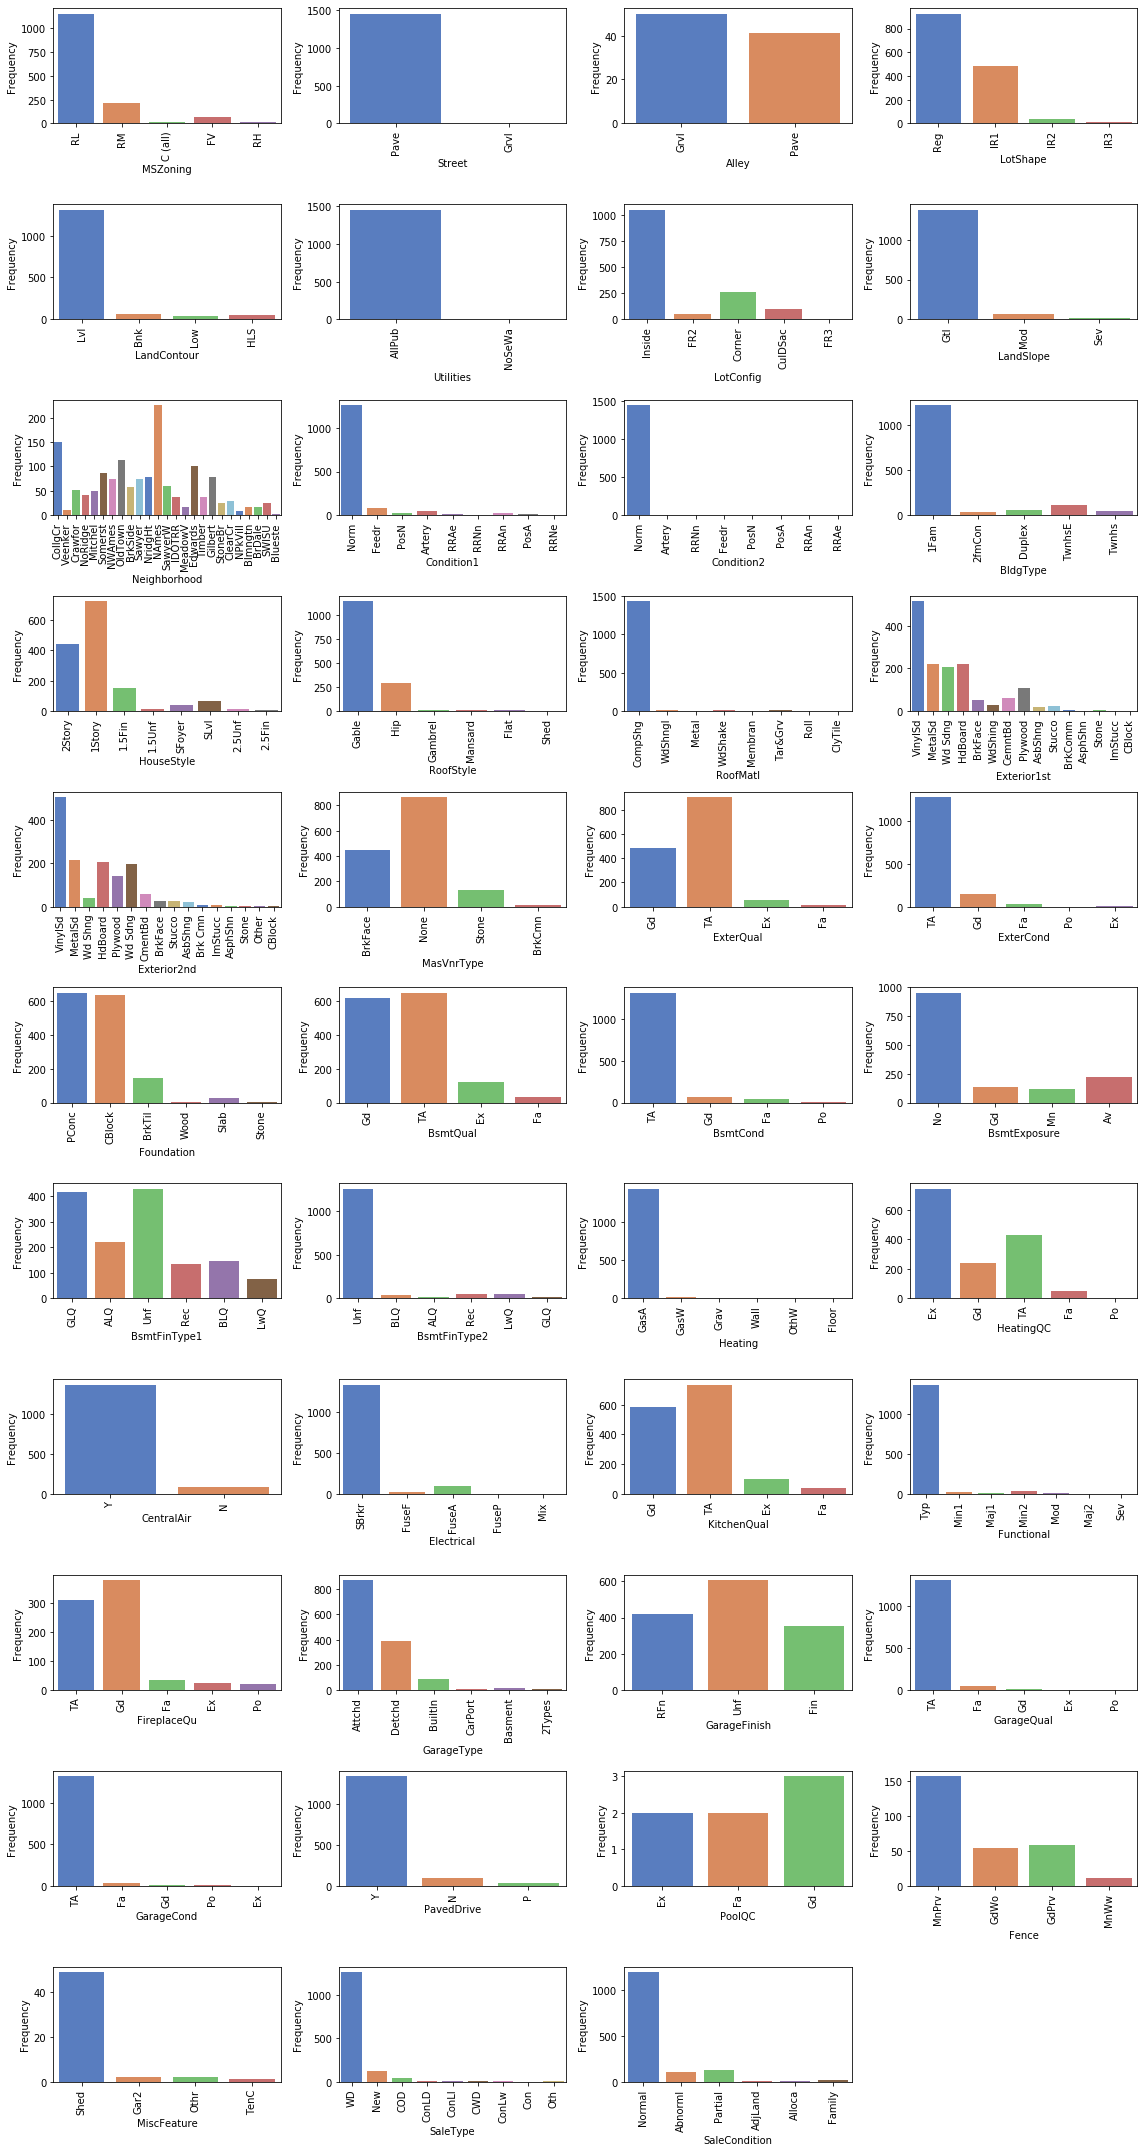

In [12]:

# Plotting distribution of data for non-numerical features
fig = plt.figure(figsize=(16,30))

for i in range(len(not_num_feats.columns)):
    fig.add_subplot(11,4,i+1)
    sns.countplot(x=not_num_feats.iloc[:,i].dropna(), palette=standard_palette)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()



After analysing the distribution of values for all features, and with the aid of the data description file, we classified the features as follows:

#### **FEATURE CLASSIFICATION:**


* **Categorical (nominal):**
> * other non_num feats!!!!!!!
> * `MSSubClass`

* **Categorical (ordinal):**
> * `OverallQual`
> * `OverallCond`
> * `ExterQual`
> * `ExterCond`
> * `BsmtQual`
> * `BsmtCond`
> * `BsmtExposure`
> * `BsmtFinType1`
> * `BsmtFinType2`
> * `HeatingQC`
> * `KitchenQual`
> * `Functional`
> * `FireplaceQu`
> * `GarageQual`
> * `GarageCond`
> * `GarageFinish`
> * `PoolQC`
> * `Fence`

* **Discrete (ratio):**
> * `YearBuilt`
> * `YearRemodAdd`
> * `BsmtFullBath`
> * `BsmtHalfBath`
> * `FullBath`
> * `HalfBath`
> * `BedroomAbvGr`
> * `KitchenAbvGr`
> * `TotRmsAbvGrd`
> * `Fireplaces`
> * `GarageYrBlt`
> * `GarageCars`
> * `GarageArea`
> * `MoSold`
> * `YrSold`

* **Continuous (ratio):**
> * `LotFrontage`
> * `LotArea`
> * `MasVnrArea`
> * `BsmtFinSF1`
> * `BsmtFinSF2`
> * `BsmtUnfSF`
> * `TotalBsmtSF`
> * `1stFlrSF`
> * `2ndFlrSF`
> * `LowQualFinSF`
> * `GrLivArea`
> * `WoodDeckSF`
> * `OpenPorchSF`
> * `EnclosedPorch`
> * `3SsnPorch`
> * `ScreenPorch`
> * `PoolArea`
> * `MiscVal`


In [13]:

nominal_feats=['MSSubClass',]
ordinal_feats=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
               'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
               'KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond',
               'GarageFinish','PoolQC','Fence']

disc_feats=['YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath',
            'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
            'Fireplaces','GarageYrBlt','GarageCars','GarageArea','MoSold','YrSold']

cont_feats=[]

#FINISH!!!!!

### 3.5 - Bivariate analysis of numerical features

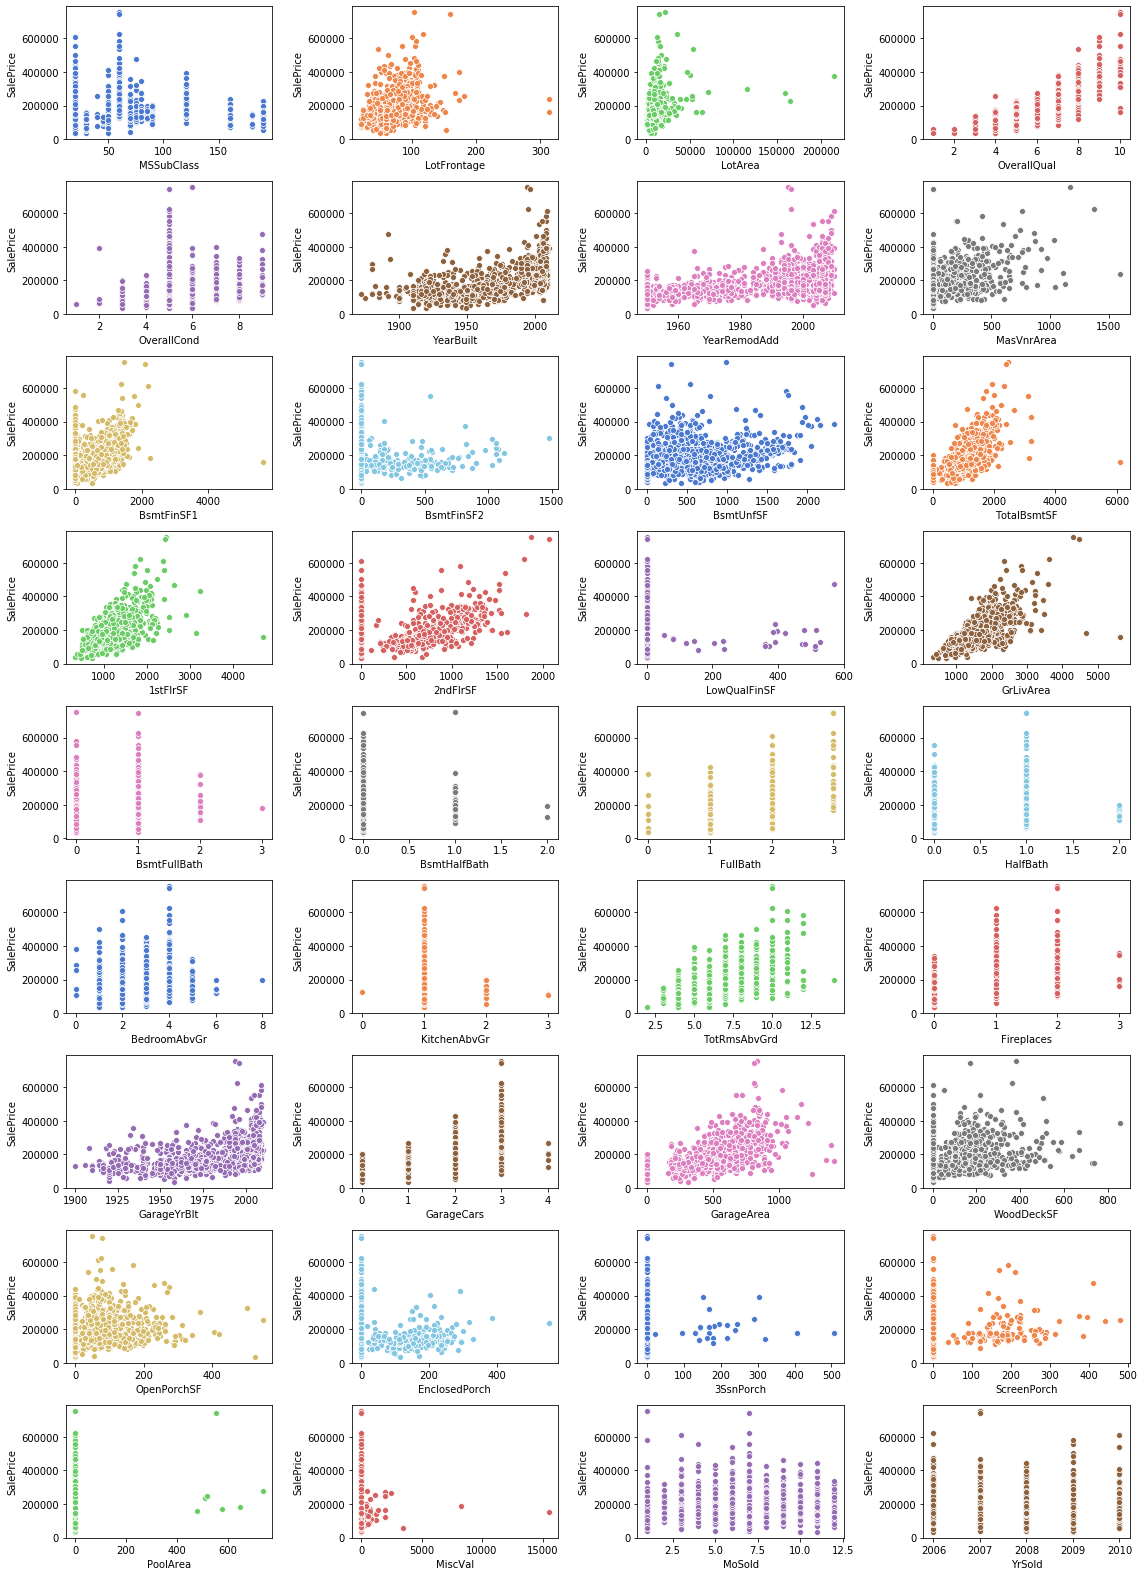

In [14]:

# Plotting scaterrplots of numerical features versus the target variable 'SalePrice'
fig = plt.figure(figsize=(16,22))
for i in range(len(num_feats.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(num_feats.iloc[:, i],data['SalePrice'], color= standard_palette[i])
plt.tight_layout()
plt.show()


### 3.6 - Correlation between features

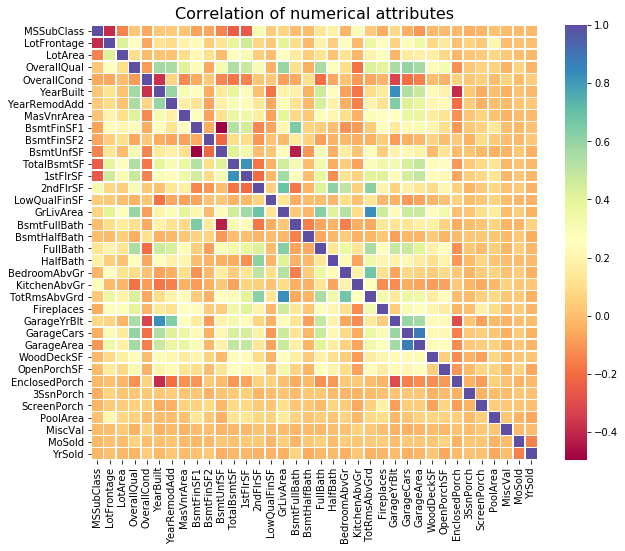

In [15]:

# Calculating correlation matrix of numerical features
correlations = num_feats.corr()

f, ax = plt.subplots(figsize=(10,8))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlations, cmap="Spectral", linewidths=0.5)
plt.show()


In [16]:

# Finding correlation matrix for highly correlated features
high_corr = correlations[(correlations>abs(0.7)) & (correlations!=1)]
high_corr=high_corr.dropna(how='all')
high_corr=high_corr.dropna(axis=1,how='all')
high_corr


,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
YearBuilt,NaN,NaN,NaN,NaN,NaN,0.825667,NaN,NaN
TotalBsmtSF,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,0.825489,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,0.825489,NaN,NaN,NaN,NaN
GarageYrBlt,0.825667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475
GarageArea,NaN,NaN,NaN,NaN,NaN,NaN,0.882475,NaN


#### **Highly correlated features:**

- `YearBuilt` and `GarageYrBlt`
- `TotalBsmtSF` and `1stFlrSF`
- `GrLivArea` and `TotRmsAbvGrd`
- `GarageCars` and `GarageArea`

In [17]:

# Examining correlation of numerical features with 
target_corr = num_feats.corrwith(data['SalePrice'])
target_corr = target_corr.sort_values(ascending=False)

print('Correlation of numerical features with target variable:')
print('')

target_corr


Correlation of numerical features with target variable:



OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

#### **NOTES FROM (3.4):**

* The following features are highly correlated:
    - `YearBuilt` and `GarageYrBlt`
    - `TotalBsmtSF` and `1stFlrSF`
    - `GrLivArea` and `TotRmsAbvGrd`
    - `GarageCars` and `GarageArea`
    
    
* The following variables should be deleted:
    * `GarageYrBlt`
    * `1stFlrSF`
    * `GarageArea`


### 3.7 - Overview of missing values

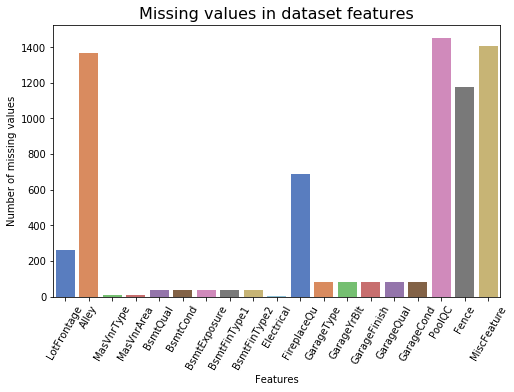

In [18]:

# Plotting missing value counts for features in training data

missing = data.isnull().sum()
missing = missing[missing>0]
#missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.reset_index(inplace=True)
missing.columns=['Features', 'Number of missing values']

plt.figure(figsize=(8, 5))
sns.barplot(x='Features', y='Number of missing values', data=missing, palette=standard_palette)
plt.xticks(rotation=60)
plt.title('Missing values in dataset features', size=16)

plt.show()


In [19]:

# Checking dataset missing values as percentage of total entries
null = pd.DataFrame(data={'%Missing Values': data.isnull().mean()[data.isnull().mean() > 0]})
null = round(null* 100, 2)
null = null.sort_values(by= '%Missing Values', ascending=False)

null.index.name='Feature'
null


,%Missing Values
Feature,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55


## 4 - Data cleaning and preprocessing


> [4.1 - Outliers](#4.1---Outliers)
> 
> [4.2 - Highly correlated features](#4.2---Highly-correlated-features)
> 
> [4.3 - Missing values](#4.3---Missing-values)
> 
> [4.4 - Categorical features](#4.4---Categorical-features)
> 
> [4.5 - Log transforms](#4.5---Log-transforms)

### 4.1 - Outliers

From [section 3.5](#3.5---Bivariate-analysis-of-numerical-features), we identified potential outlier data points for the following features:
- `LotFrontage`
- `LotArea`
- `MasVnrArea`
- `BsmtFinSF1`
- `TotalBsmtSF`
- `1stFlrSF`
- `LowQualFinSF`
- `GrlLivArea`
- `EnclosedPorch`
- `MiscVal`

By making a closer examination of these features' scatterplots against `SalePrice` we can confirm whether they are outliers and delete their entries from the dataset:


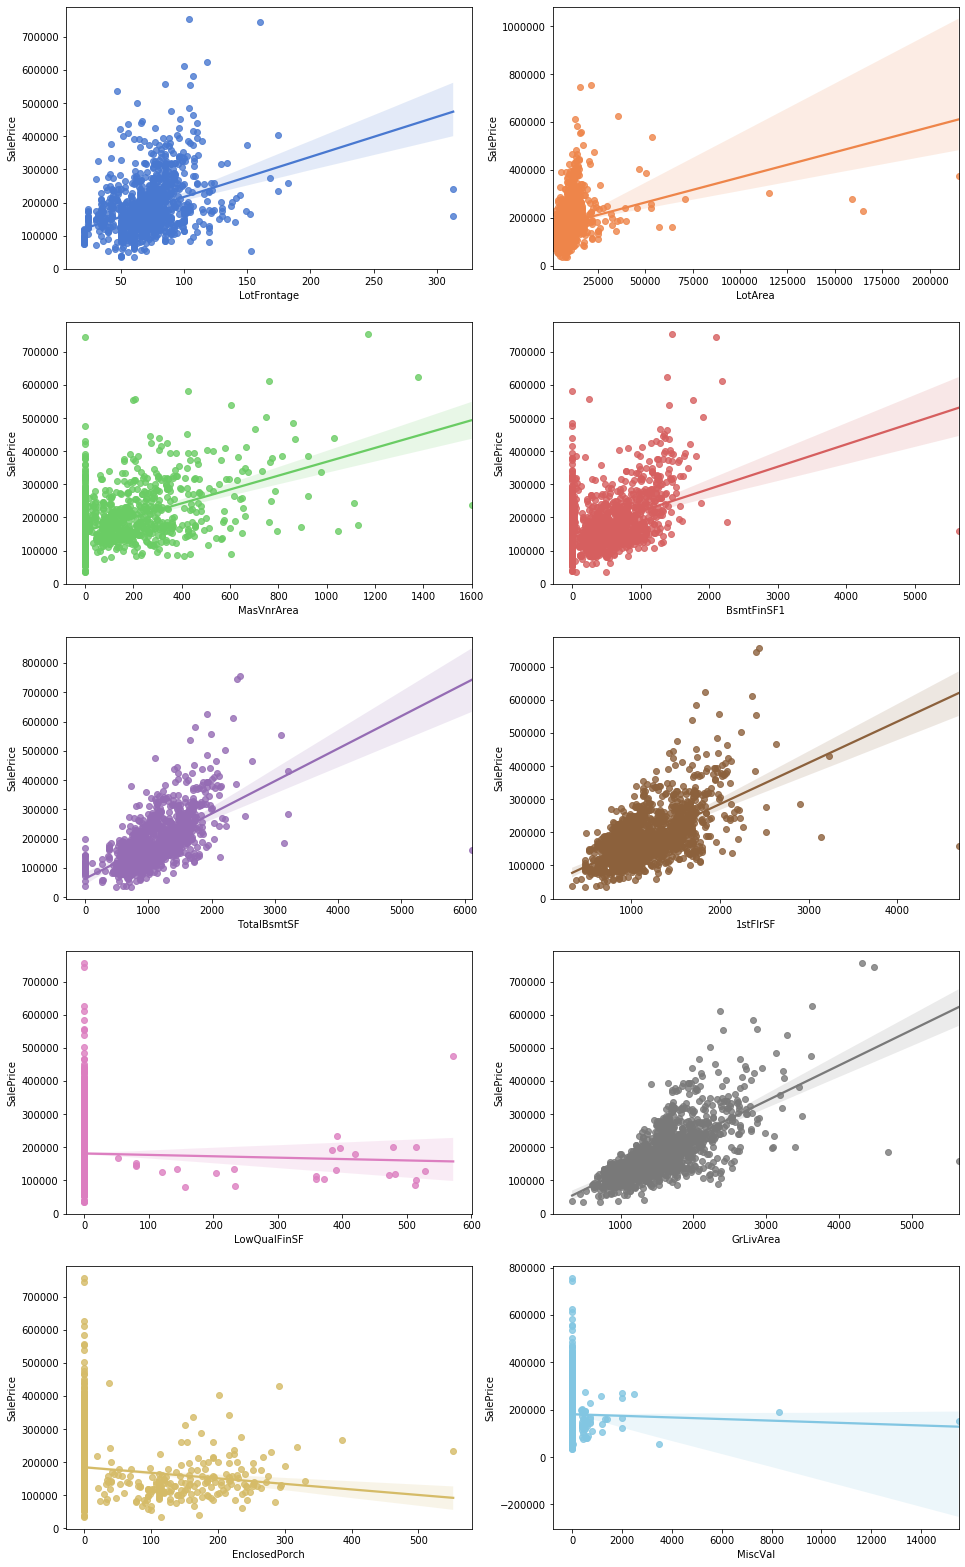

In [20]:

# Plotting enlarged scatterplots of numerical features with possible outliers versus 'SalePrice'
# , along with fitted regresssion lines

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(data['LotFrontage'], data['SalePrice'], ax=ax1, color=standard_palette[0])
_ = sns.regplot(data['LotArea'], data['SalePrice'], ax=ax2, color=standard_palette[1])
_ = sns.regplot(data['MasVnrArea'], data['SalePrice'], ax=ax3, color=standard_palette[2])
_ = sns.regplot(data['BsmtFinSF1'], data['SalePrice'], ax=ax4, color=standard_palette[3])
_ = sns.regplot(data['TotalBsmtSF'], data['SalePrice'], ax=ax5, color=standard_palette[4])
_ = sns.regplot(data['1stFlrSF'], data['SalePrice'], ax=ax6, color=standard_palette[5])
_ = sns.regplot(data['LowQualFinSF'], data['SalePrice'], ax=ax7, color=standard_palette[6])
_ = sns.regplot(data['GrLivArea'], data['SalePrice'], ax=ax8, color=standard_palette[7])
_ = sns.regplot(data['EnclosedPorch'], data['SalePrice'], ax=ax9, color=standard_palette[8])
_ = sns.regplot(data['MiscVal'], data['SalePrice'], ax=ax10, color=standard_palette[9])


In [21]:

# Deleting outliers from dataset
data = data.drop(data[data['LotFrontage']>200].index)
data = data.drop(data[data['LotArea']>100000].index)
data = data.drop(data[data['MasVnrArea']>1200].index)
data = data.drop(data[data['BsmtFinSF1']>4000].index)
data = data.drop(data[data['TotalBsmtSF']>4000].index)
data = data.drop(data[data['1stFlrSF']>4000].index)
data = data.drop(data[(data['LowQualFinSF']>550) & (data['SalePrice']>400000)].index)
data = data.drop(data[data['GrLivArea']>4000].index)
data = data.drop(data[data['EnclosedPorch']>500].index)
data = data.drop(data[data['MiscVal']>5000].index)

# Printing dataset summary
print('')
print('Training dataset')
data.info(verbose= False)
print('')



Training dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 80 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), object(43)
memory usage: 914.4+ KB



### 4.2 - Highly correlated features

In [22]:

# We delete whichever highly correlated feature has lowest correlation with target variable
data=data.drop(columns='GarageYrBlt')
data=data.drop(columns='1stFlrSF')
data=data.drop(columns='GarageArea')


### 4.3 - Missing values


From [section 3.7](#3.7---Overview-of-missing-values), two things are evident:

1. There are many features with missing data
2. The features `PoolQC`, `MiscFeature`, `Alley`, `Fence`, and `FireplaceQu` are missing data for the majority of entries

We decide to deal with missing values as follows:
- The following features will be deleted: `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`
- Continuous numerical features: Missing values will be replaced by the feature mean
- Discrete numerical features: Missing values will be replaced by the rounded feature mean
- Categorical features: Missing values will be replaced by the feature mode


In [23]:

# Deleting PoolQC, MiscFeature, Alley, Fence, and FireplaceQu from training and test datasets
data = data.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

# Separating numerical feature names and categorical feature names
num_cont_feats = list(data.select_dtypes(include='float').columns)
num_dis_feats = list(data.select_dtypes(include='int').columns)
cat_feats = list(data.select_dtypes(exclude='number').columns)

# Filling in missing values
for feat in num_cont_feats:
    data[feat] = data[feat].fillna(data[feat].mean())

for feat in num_dis_feats:
    data[feat] = data[feat].fillna(round(data[feat].mean()))

for feat in cat_feats:
    data[feat] = data[feat].fillna(data[feat].mode()[0])

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')



Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 72 entries, MSSubClass to SalePrice
dtypes: float64(2), int64(32), object(38)
memory usage: 824.1+ KB



### 4.4 - Categorical features

In [24]:

# Getting categorical feature column names
cat_feats = list(data.select_dtypes(exclude='number').columns)

# Transforming categorical features into dummy features
data = pd.get_dummies(data, columns=cat_feats, prefix= cat_feats, drop_first=True)

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')



Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 228 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(32), uint8(194)
memory usage: 668.9 KB



### 4.5 - Log transforms

In [25]:

data['SalePrice'] = np.log1p(data['SalePrice'])
#data.to_csv('clean_training_data.csv', index=False)

## 5 - Modelling


> [5.1 - Evaluation metrics](#5.1---Evaluation-metrics)
> 
>[5.2 - Retrieving and cleaning test data](#5.2---Retrieving-and-cleaning-test-data)
>
> [5.3 - Defining feature matrices and target vectors](#5.3---Defining-feature-matrices-and-target-vectors)
> 
> [5.4 - Initial model comparison](#5.4---Initial-model-comparison)
> 
> [5.5 - Hyperparameter tuning](#5.5---Hyperparameter-tuning)
>
> [5.6 - Final model](#5.6---Final-model)

### 5.1 - Evaluation metrics


The metric used to evaluate predictions is the Root-Mean-Squared-Error between the logarithm of actual sale prices and the logarithm of predicted sale prices (RMSLE).


### 5.2 - Retrieving and cleaning test data

In [26]:

# Retrieving test data and printing general overview
test_data = pd.read_csv('test.csv')
test_data.info(verbose=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 80 entries, Id to SaleCondition
dtypes: float64(11), int64(26), object(43)
memory usage: 912.0+ KB


In [27]:

# Deleting 'Id' column
test_data = test_data.drop(columns='Id')

# Deleting highly correlated features
test_data=test_data.drop(columns='GarageYrBlt')
test_data=test_data.drop(columns='1stFlrSF')
test_data=test_data.drop(columns='GarageArea')

# Checking testing dataset missing values
null = pd.DataFrame(data={'%Missing Values (test)': test_data.isnull().mean()[test_data.isnull().mean() > 0]})
null = round(null* 100, 2)
null = null.sort_values(by= '%Missing Values (test)', ascending=False)

null.index.name='Feature'
null


,%Missing Values (test)
Feature,
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
FireplaceQu,50.03
LotFrontage,15.56
GarageCond,5.35
GarageQual,5.35
GarageFinish,5.35


In [28]:

test_data = test_data.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

# Separating numerical feature names and categorical feature names
num_cont_feats = list(test_data.select_dtypes(include='float').columns)
num_dis_feats = list(test_data.select_dtypes(include='int').columns)
cat_feats = list(test_data.select_dtypes(exclude='number').columns)

# Filling in missing values
for feat in num_cont_feats:
    test_data[feat] = test_data[feat].fillna(test_data[feat].mean())

for feat in num_dis_feats:
    test_data[feat] = test_data[feat].fillna(round(test_data[feat].mean()))


for feat in cat_feats:
    test_data[feat] = test_data[feat].fillna(test_data[feat].mode()[0])

# One-hot encoding test dataset
test_data = pd.get_dummies(test_data, columns=cat_feats, prefix= cat_feats, drop_first=True)

# Printing dataset summary
print('Test dataset:')
test_data.info(verbose=False)
print('')

Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 213 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(9), int64(24), uint8(180)
memory usage: 632.7 KB



In [29]:

# Deleting training dataset features that don't appear in test dataset
test_feats = list(test_data.columns) 
test_feats.append('SalePrice')

data = data[test_feats]

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')
print('Test dataset:')
test_data.info(verbose=False)
print('')


#test_data.to_csv('clean_test_data.csv', index=False)


Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 214 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(31), uint8(180)
memory usage: 649.1 KB

Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 213 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(9), int64(24), uint8(180)
memory usage: 632.7 KB



### 5.3 - Defining feature matrices and target vectors

In [30]:

# Defining training feature matrix and target vector
X_train = data.drop(columns='SalePrice')
y_train= data['SalePrice']

# Defining test feature matrix
X_test = test_data


### 5.4 - Initial model comparison

In this section, we compare the performance of different prediction models prior to hyperparameter tuning. Since the target variable `SalePrice` is continuous, making its prediction a regression problem, the following models will be compared:

* Linear regression
* Ridge regression
* Lasso regression
* Elastic Net regression
* KNN regressor
* Decision Tree regressor
* Random Forest regressor

For two of these models (Elastic Net and Lasso) feature data will be standardized as this is known to significantly improve performance. For the KNN model, feature data will be normalized for the same reason. Finally, the maximum number of itterations for the Lasso model has been increased to 30,000 to facilitate convergence.


In [31]:

# Instantiating cross-validation score arrays:
# Feature data for Elastic Net and Lasso models is standardized
# Feature data for KNN is normalized

models = {'Linear regression': Pipeline([('model', LinearRegression())]),
          'Ridge': Pipeline([('scaler', StandardScaler()),('model', Ridge())]),
          'Lasso': Pipeline([('scaler', StandardScaler()),('model', Lasso(max_iter=5000))]),
          'Elastic Net': Pipeline([('scaler', StandardScaler()),('model', ElasticNet(max_iter=5000))]), 
          'KNN': Pipeline([('scaler', Normalizer()),('model', KNeighborsRegressor())]),
          'Random Forest': Pipeline([('model', RandomForestRegressor(random_state=0))])}



Next, we utilize 10-fold cross-validation on the training dataset to compute the average Mean Absolute Error across folds:


In [32]:

# 10-fold cross-validation of predictive models using default hyperparameters

cv_mae_scores = []
cv_training_times = []

for key in models:
    print('Running '+ key+ ' model...')
    
    %time cv = cross_validate(models[key], X_train, y_train, scoring='neg_mean_absolute_error',cv=10)
    cv_mae_scores.append(cv['test_score'].mean())
    cv_training_times.append(cv['fit_time'].mean())
    
    print('Finished running.')
    print('')

scores = pd.DataFrame(data={'Model': list(models.keys()),
                            'Average MAE ($USD)': cv_mae_scores,
                            'Average Training Time (seconds)': cv_training_times})

scores['Average MAE ($USD)'] = round(scores['Average MAE ($USD)']*(-1), 3)
scores = scores.set_index('Model').sort_values(by='Average MAE ($USD)', ascending=True)
scores


Running Linear regression model...
CPU times: user 573 ms, sys: 19.4 ms, total: 593 ms
Wall time: 175 ms
Finished running.

Running Ridge model...
CPU times: user 552 ms, sys: 18 ms, total: 570 ms
Wall time: 153 ms
Finished running.

Running Lasso model...
CPU times: user 464 ms, sys: 11.9 ms, total: 476 ms
Wall time: 120 ms
Finished running.

Running Elastic Net model...
CPU times: user 438 ms, sys: 9.56 ms, total: 448 ms
Wall time: 112 ms
Finished running.

Running KNN model...
CPU times: user 851 ms, sys: 10.4 ms, total: 862 ms
Wall time: 330 ms
Finished running.

Running Random Forest model...
CPU times: user 16.7 s, sys: 92.6 ms, total: 16.8 s
Wall time: 16.8 s
Finished running.



,Average MAE ($USD),Average Training Time (seconds)
Model,,
Linear regression,0.081,0.015466
Ridge,0.081,0.013235
Random Forest,0.094,1.670115
KNN,0.163,0.011551
Lasso,0.307,0.010120
Elastic Net,0.307,0.009271


From the console output above, two things can be concluded:

1. KNN and Decision trees performed significantly worse than all other models.
2. Random Forest and Lasso regression were decisively slower.

Nevertheless, since none of these models are exceedingly computationally expensive, we will carry on comparing all of them as their performance could change significantly after hyperparameters are tuned.

### 5.5 - Hyperparameter tuning


In order to carry out hyperparameter tuning, we first specify the parameters that will be tuned in each model as well as the range of values that they may take:


In [33]:

# Hyperparameters for Ridge regression
ridge_params={'model__alpha': np.linspace(0.5,20,40),
              'scaler__with_mean':[True,False],
              'scaler__with_std':[True,False]}

# Hyperparameters for Lasso regression
lasso_params={'model__alpha': np.linspace(0.5,20,40),
              'scaler__with_mean':[True,False],
              'scaler__with_std':[True,False]}

# Hyperparameters for Elastic Net regression
e_net_params={'model__alpha': np.linspace(1,20,20),
              'model__l1_ratio': np.linspace(0,1,21),
              'scaler__with_mean':[True,False],
              'scaler__with_std':[True,False]}

# Hyperparameters for KNN regressor
knn_params={'model__n_neighbors': np.arange(1,50,1)}

# Hyperparameters for Random Forest classifier
rf_params={'model__n_estimators': np.arange(10,310,10),
           'model__max_features': ['auto', 'sqrt','log2'],
           'model__max_depth': np.arange(1,200,1),
           'model__min_samples_split': np.arange(2,20,1),
           'model__min_samples_leaf': np.arange(1,10,1),
           'model__bootstrap': [True, False]
          }

model_param_grids = {'Ridge': ridge_params,
                     'Lasso': lasso_params,
                     'Elastic Net': e_net_params,
                     'KNN': knn_params, 
                     'Random Forest': rf_params}



We now utilize grid search 5-fold cross-validation to iterate over the hyperparameter value ranges and find the optimal combination:


In [34]:

cv_scores = []

for key in models:
    
    print('Running '+ key+ ' model...')
    
    if key in ['Ridge','Lasso', 'KNN']:
        grid_search_cv = GridSearchCV(models[key], model_param_grids[key], scoring='neg_mean_absolute_error')
        %time grid_search_cv.fit(X_train, y_train)
        cv_scores.append(grid_search_cv.best_score_)
        print(grid_search_cv.best_params_)
        
    elif key in ['Elastic Net', 'Random Forest']:
        rand_search_cv = RandomizedSearchCV(models[key], 
                                            model_param_grids[key],
                                            scoring='neg_mean_absolute_error', 
                                            random_state=0)
        
        %time rand_search_cv.fit(X_train, y_train)
        cv_scores.append(rand_search_cv.best_score_)
        print(rand_search_cv.best_params_)
        
    
    print('Finished running.')
    print('')

scores = pd.DataFrame(data={'Model': list(models.keys()),
                            'Average MAE ($USD)': cv_scores})

scores['Average MAE ($USD)'] = round(scores['Average MAE ($USD)']*(-1), 3)
scores = scores.set_index('Model').sort_values(by='Average MAE ($USD)', ascending=True)
scores

Running Linear regression model...
Finished running.

Running Ridge model...
CPU times: user 34.5 s, sys: 293 ms, total: 34.8 s
Wall time: 8.75 s
{'model__alpha': 10.0, 'scaler__with_mean': True, 'scaler__with_std': False}
Finished running.

Running Lasso model...
CPU times: user 39.7 s, sys: 592 ms, total: 40.3 s
Wall time: 10.1 s
{'model__alpha': 0.5, 'scaler__with_mean': True, 'scaler__with_std': False}
Finished running.

Running Elastic Net model...
CPU times: user 2.54 s, sys: 51.6 ms, total: 2.59 s
Wall time: 647 ms
{'scaler__with_std': False, 'scaler__with_mean': False, 'model__l1_ratio': 0.05, 'model__alpha': 10.0}
Finished running.

Running KNN model...
CPU times: user 16.8 s, sys: 98.5 ms, total: 16.9 s
Wall time: 16.4 s
{'model__n_neighbors': 11}
Finished running.

Running Random Forest model...
CPU times: user 32.9 s, sys: 198 ms, total: 33.1 s
Wall time: 33.2 s
{'model__n_estimators': 80, 'model__min_samples_split': 14, 'model__min_samples_leaf': 8, 'model__max_features': 

ValueError: arrays must all be same length

### 5.6 - Final model

The final Random Forrest model is instantiated with the optimal hyperparameter arguments derived in section 5.4 and trained using the features selected in section 5.3.

In [ ]:
# Separating target variable vector y
y = data['SalePrice']

# Creating feature matrix X
X = data[selected_features]

# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_final_model = RandomForestRegressor(random_state=0, n_estimators=180, max_depth=16 )

# fit rf_model_on_full_data on all data from the training data
rf_final_model.fit(X,y)

## 6 - Final predictions and submission

In [ ]:

# Creating feature matrix for test data
test_X = test_data[selected_features]

# Predicting SalePrice for test data 
test_preds = rf_final_model.predict(test_X )

# Creating submission file
output = pd.DataFrame({'Id': test_data.Id,'SalePrice': test_preds})
output.to_csv('submission1.csv', index=False)